In [1]:
import sys

sys.path.append("..")

from plot import *
from merra2 import *

In [6]:
n = 10000000
quantile = 0.9935

In [7]:
df = pd.read_feather(f"subset/UV-{quantile}-{n}.ft")
df.head()

,time,lev,lat,lon,U_est,V_est,U,V
0,2452,0,41,223,26.390625,3.857422,26.421875,3.845703
1,766,0,174,458,-2.804688,-2.136719,-2.679688,-1.933594
2,869,0,297,468,10.500000,-2.021484,10.625000,-1.998047
3,2272,0,26,264,7.726562,3.412109,7.730469,3.423828
4,2787,0,266,269,13.054688,-2.029297,13.171875,-2.205078


In [16]:
hist_kwargs = {"cmap": cmr.arctic, "cmax": 0.5, "cmin": 0.2}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


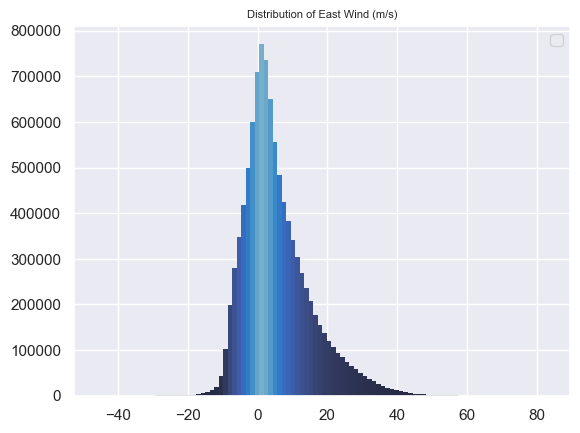

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

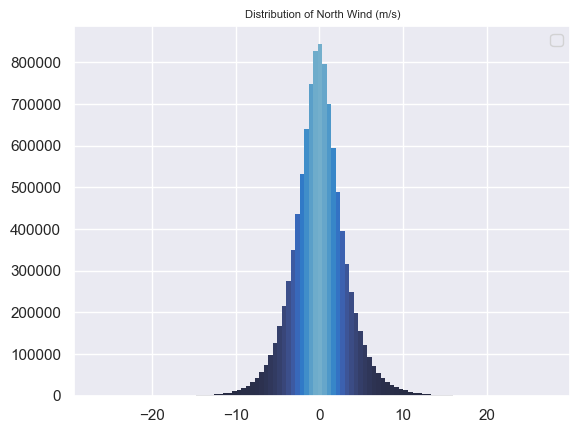

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

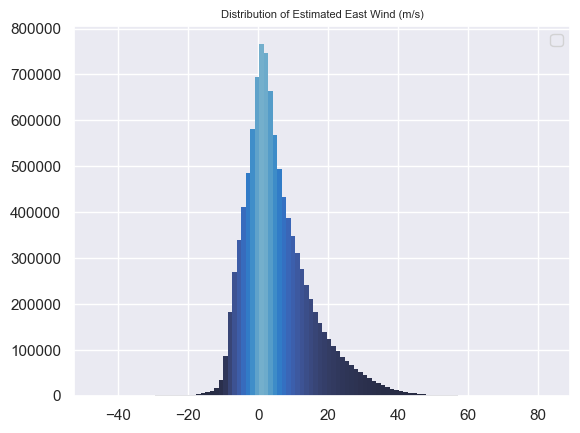

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

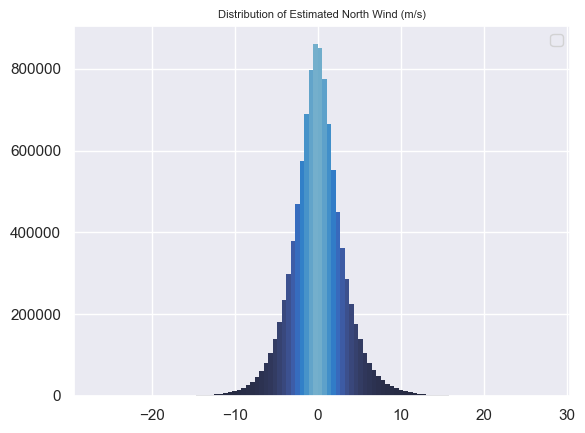

<Figure size 640x480 with 0 Axes>

In [33]:
for var in ["U", "V", "U_est", "V_est"]:
    plot_histogram([{"data": df[var]}], f"Distribution of {format_variable(var)}", bins=100, **hist_kwargs)
    plt.savefig(f"../assets/subset/{var}-{n}-distribution", dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


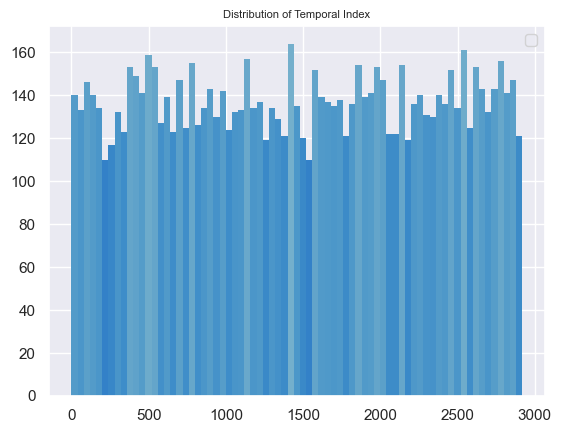

<Figure size 640x480 with 0 Axes>

In [21]:
plot_histogram([{"data": df["time"]}], f"Distribution of Temporal Index", bins=73, **hist_kwargs)
plt.savefig(f"../assets/subset/t-{n}-distribution", dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


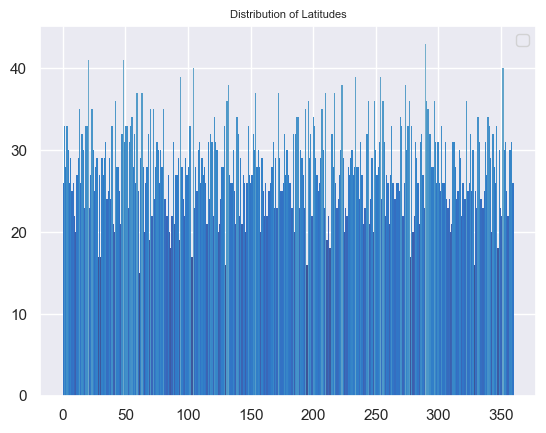

<Figure size 640x480 with 0 Axes>

In [22]:
plot_histogram([{"data": df["lat"]}], f"Distribution of Latitudes", bins=361, **hist_kwargs)
plt.savefig(f"../assets/subset/lat-{n}-distribution", dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


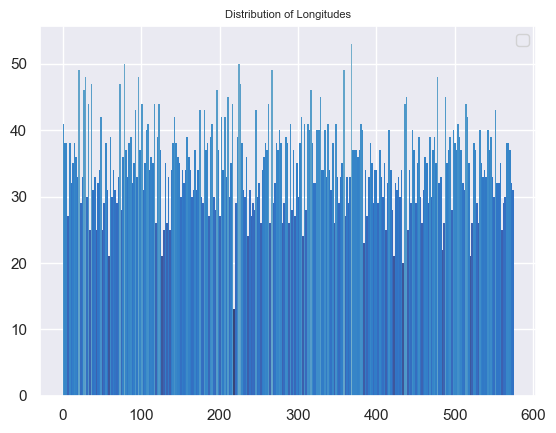

<Figure size 640x480 with 0 Axes>

In [24]:
plot_histogram([{"data": df["lon"]}], f"Distribution of Longitudes", bins=288, **hist_kwargs)
plt.savefig(f"../assets/subset/lon-{n}-distribution", dpi=300)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


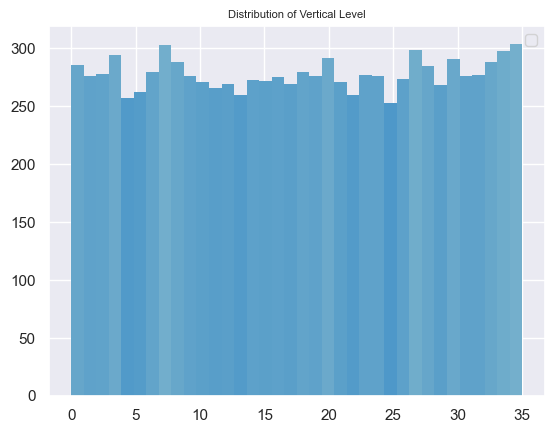

<Figure size 640x480 with 0 Axes>

In [25]:
plot_histogram([{"data": df["lev"]}], f"Distribution of Vertical Level", bins=36, **hist_kwargs)
plt.savefig(f"../assets/subset/lev-{n}-distribution", dpi=300)


In [ ]:
seaborn.pairplot(df, hue="lev", palette=seaborn.color_palette("mako_r", 36), corner=True)
plt.savefig(f"../assets/subset/t-lat-lon-U-V-U_est-V_est", dpi=300)


In [ ]:
for min_lev in tqdm(range(0, 35, 2)):
    max_lev = min_lev + 1
    seaborn.pairplot(df[df["lev"] <= max_lev][df["lev"] >= min_lev], hue="lev", palette=seaborn.color_palette("mako_r", max_lev - min_lev + 1), kind="kde")
    plt.savefig(f"../assets/subset/t-lat-lon-U-V-U_est-V_est-density-{min_lev}<=lev<={max_lev}", dpi=300)
